In [1]:
import pandas as pd

In [2]:
hdata=pd.read_csv("Real_estate.csv")

In [3]:
hdata.columns=['transaction date','house age','MRT station','number of convenience stores','latitude','longitude','house price of unit area']

In [4]:
hdata.head().transpose()

,0,1,2,3,4
transaction date,2012.91700,2012.91700,2013.58300,2013.50000,2012.83300
house age,32.00000,19.50000,13.30000,13.30000,5.00000
MRT station,84.87882,306.59470,561.98450,561.98450,390.56840
number of convenience stores,10.00000,9.00000,5.00000,5.00000,5.00000
latitude,24.98298,24.98034,24.98746,24.98746,24.97937
longitude,121.54024,121.53951,121.54391,121.54391,121.54245
house price of unit area,37.90000,42.20000,47.30000,54.80000,43.10000


In [5]:
hdata.describe()

,transaction date,house age,MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A6465BDC48>,
      dtype=object)

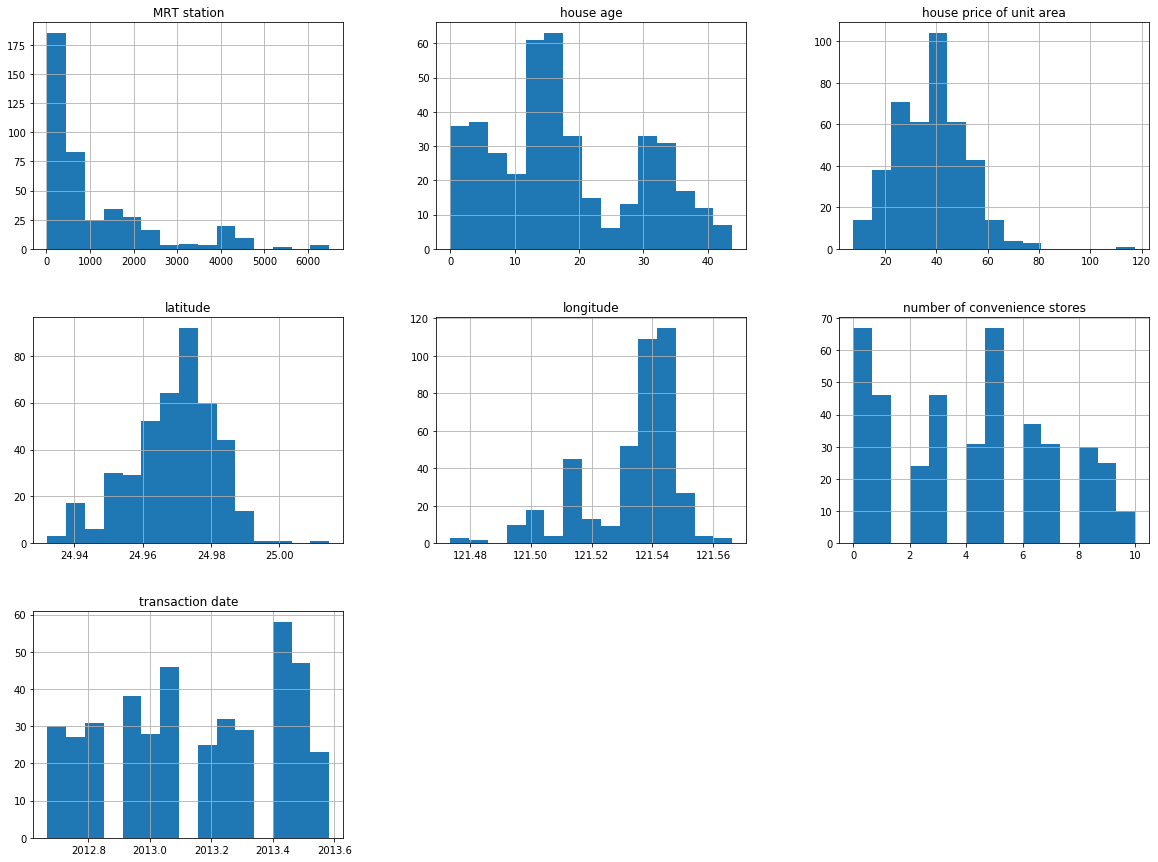

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
hdata.hist(bins=15,figsize=(20,15))

In [7]:
corrmatrix=hdata.corr()
corrmatrix['house price of unit area'].sort_values(ascending=False)

house price of unit area        1.000000
number of convenience stores    0.571005
latitude                        0.546307
longitude                       0.523287
transaction date                0.087491
house age                      -0.210567
MRT station                    -0.673613
Name: house price of unit area, dtype: float64

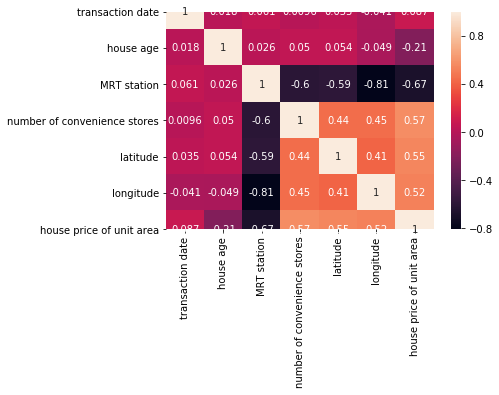

In [8]:
import seaborn as sns
sns.heatmap(corrmatrix,annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A6571CE108>,
      dtype=object)

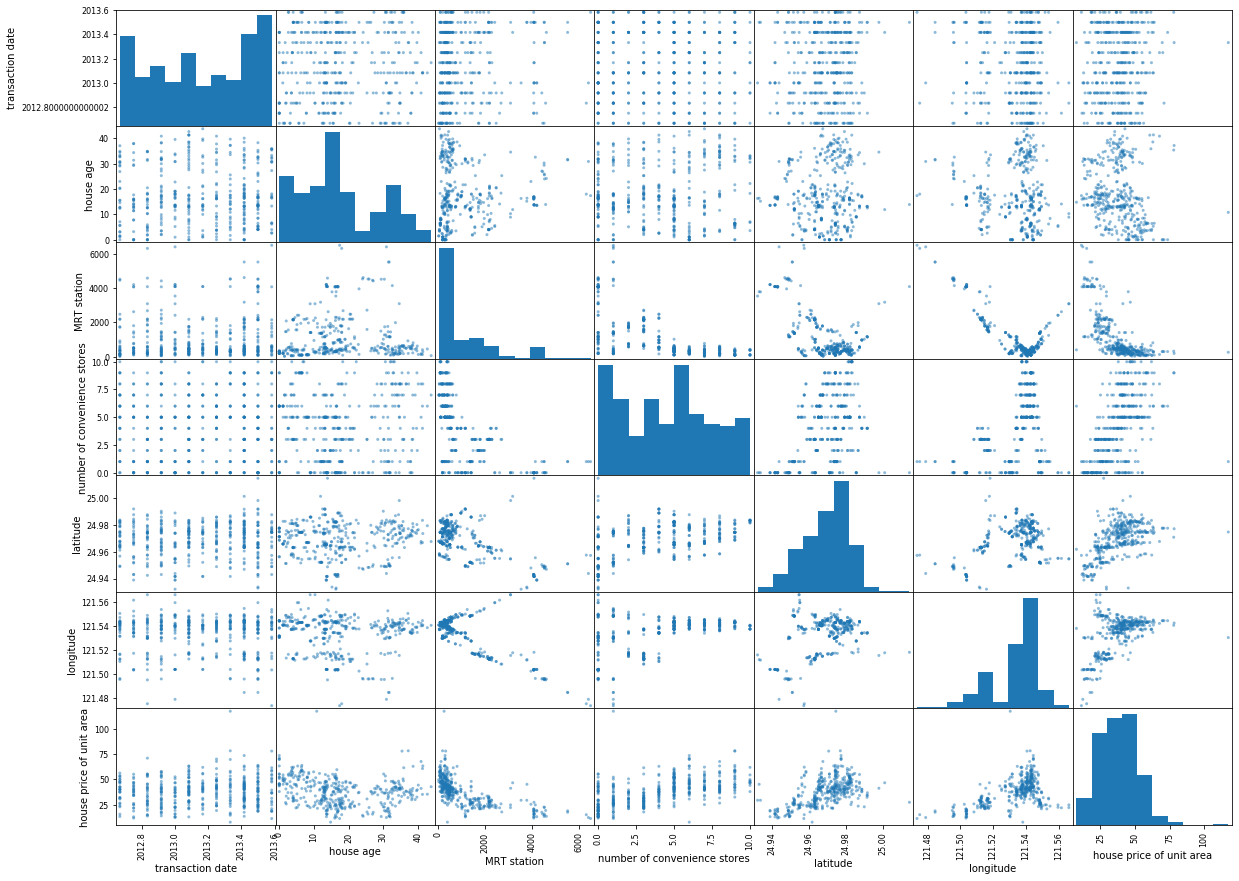

In [9]:
from pandas.plotting import scatter_matrix
attributes = ['transaction date','house age','MRT station','number of convenience stores','latitude','longitude','house price of unit area']
scatter_matrix(hdata[attributes], figsize = (20,15))

In [10]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
transaction date                414 non-null float64
house age                       414 non-null float64
MRT station                     414 non-null float64
number of convenience stores    414 non-null int64
latitude                        414 non-null float64
longitude                       414 non-null float64
house price of unit area        414 non-null float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [11]:
hdata.isna()

,transaction date,house age,MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False


In [12]:
#housing = hdata.drop("house price of unit area", axis=1)
#housing_labels = np.array(hdata["house price of unit area"].copy()).reshape(414,1)
#print(housing.shape, housing_labels.shape)

In [13]:
hdata_X=hdata.iloc[:,:-1]
hdata_Y=hdata.iloc[:,-1]
print(hdata_X.shape ,hdata_Y.shape)

(414, 6) (414,)


In [14]:
hdata_X.head()

,transaction date,house age,MRT station,number of convenience stores,latitude,longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [15]:
hdata_Y#.head()

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: house price of unit area, Length: 414, dtype: float64

In [16]:
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
    ('normalizer',Normalizer()),
])

In [17]:
hdata_X=my_pipeline.fit_transform(hdata_X)
#hdata_Y=my_pipeline.fit_transform(hdata_Y)

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(hdata_X,hdata_Y,test_size=0.15,random_state=42)
#print("Rows in train set:",len(train_set), "\nRows in test set:",len(test_set))

In [19]:
xtrain.shape

(351, 6)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [21]:
y_pred=model.predict(xtest)
y_pred

array([47.24      , 42.4135    , 55.97      , 35.24      , 25.39      ,
       56.04      , 46.67      , 50.24666667, 15.84      , 55.13      ,
       24.97      , 31.93      , 31.7       , 17.        , 36.42      ,
       25.16      , 48.01      , 52.195     , 26.61      , 39.91      ,
       16.72      , 26.54      , 57.25      , 43.67333333, 14.375     ,
       32.16      , 15.26      , 51.54      , 40.93      , 43.12      ,
       19.42      , 27.26      , 39.08      , 25.07      , 47.99      ,
       35.57      , 56.7       , 16.39      , 43.38      , 51.23      ,
       48.75      , 42.48      , 44.08      , 39.75      , 40.58833333,
       50.93      , 40.16      , 23.42      , 47.55      , 47.58      ,
       47.48      , 54.78      , 42.91      , 43.35      , 42.79      ,
       15.88      , 38.42      , 27.07      , 23.09      , 50.21      ,
       26.81      , 25.7       , 15.88      ])

In [22]:
import numpy as np
a=np.array(ytest)
a

array([45.1, 42.3, 52.2, 37.3, 22.8, 36.3, 53. , 51.4, 16.1, 59. , 30.6,
       30.7, 35.6, 13.7, 62.9, 30.5, 41.9, 54.4, 29.5, 43.7, 12.2, 22.1,
       49.5, 47.4, 18.6, 28.5, 14.7, 45.4, 41. , 35.1, 22.1, 28.9, 30.5,
       26.5, 49.3, 37. , 56.3, 15.4, 48.5, 63.3, 50.5, 42.2, 37.9, 37.5,
       40.5, 57.4, 26.5, 21.8, 49.7, 47.1, 49. , 60.7, 33.1, 41. , 36.5,
       20. , 34.7, 30.6, 25.6, 46.2, 27.7, 27. , 15.6])

In [23]:
#from sklearn.metrics import accuracy_score
#score=accuracy_score(ytest,y_pred)
#y_pred=y_pred.reshape(63,1)

In [24]:
#model.score(y_pred,ytest)

In [25]:
model.score(xtrain,ytrain)

0.9322797458952551

In [26]:
model.score(xtest,ytest)

0.7885771455708027

# saving model in pickle

In [27]:
import pickle
pickle_out = open("Pricemodel.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

# using model

In [28]:
testdata=pd.read_csv('testdata.csv')

In [29]:
pickle_in = open("Pricemodel.pkl","rb")
model=pickle.load(pickle_in)

In [30]:
model.predict(testdata)

array([26.22, 25.77, 26.22, 26.22, 26.22, 26.22, 26.22, 26.22, 26.22,
       26.22, 26.22, 26.22, 26.22, 26.22, 26.22, 26.22, 26.22, 26.22,
       26.22, 26.22, 26.22, 26.22, 26.22, 26.22, 26.22, 26.22, 25.77,
       26.22, 26.22, 26.22, 26.22, 26.22, 26.22, 26.22, 26.22, 26.22,
       26.22, 26.22, 26.22, 26.22, 26.22, 26.22, 26.22, 26.22, 26.22,
       26.22, 26.22, 26.22, 26.22, 26.22, 26.22, 26.22, 26.22, 26.22,
       26.22, 26.22, 26.22, 26.22, 26.22, 26.22, 26.22, 26.22])

In [31]:
features=np.array([[2012.75,15.6,752.7669,2,24.97795,121.53451000000001]])

In [32]:
model.predict(features)

array([26.22])